In [1]:
import os
os.chdir(r'C:\Users\tanzh\Documents\AI & Machine Learning\my_module')
import ml_metrics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px

import sklearn.metrics as metrics
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.preprocessing as pp
import sklearn.decomposition as decom
import sklearn.utils as utils # for the resample function
import sklearn.compose as compose
import sklearn.pipeline as pipeline

In [3]:
data = pd.read_excel(r'C:\Users\tanzh\Documents\AI & Machine Learning\Hands-On Machine Learning Codes\Statquest\default of credit card clients - working version.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

# Transformation

In [5]:
# rename the name of the target column 
data.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.SEX.unique() # THIS IS CORRECT

array([2, 1], dtype=int64)

In [7]:
data.EDUCATION.unique() # THE ALLOWED NUMBERS ARE 1,2,3,4. IT ALSO CONTAIN 0,5,6. NOT SURE WHAT 0,5,6 ARE

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [8]:
data.MARRIAGE.unique() 

array([1, 2, 3, 0], dtype=int64)

In [9]:
# there are 68 entries where there are values with 0 in either the marriage or education column
data[(data['EDUCATION'] == 0) | (data['MARRIAGE'] == 0) ]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
218,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28603,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28766,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29078,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


In [10]:
# we only look at data where there is no 0 values under the education or the marriage column
data = data[(data['EDUCATION'] != 0) | (data['MARRIAGE'] != 0) ]

# Downsample the data

* We need to downsize the number of data in the dataset
* SWM does not work well with huge dataset
* We will limit the number of instances in each category (default and did not default) to 1000 each

In [11]:
data_default = data[data['DEFAULT'] == 1]
data_no_default = data[data['DEFAULT'] == 0]

In [12]:
data_default_resample = utils.resample(data_default, replace=False, n_samples=6000, random_state=42)
data_no_default_resample = utils.resample(data_no_default, replace=False, n_samples=6000, random_state=42)

In [13]:
data_downsize = pd.concat([data_default_resample, data_no_default_resample])

# Column Transformation

In [14]:
# Splitting data into dependent and target variables

X = data_downsize.copy()
X.drop('DEFAULT', axis=1, inplace=True)

y = data_downsize['DEFAULT'].copy()

In [15]:
X_cat_attribute = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X_num_attribute = [i for i in X.columns if i not in X_cat_attribute]

In [16]:
num_pipeline = pipeline.Pipeline([
                                    ('std_scaler', pp.StandardScaler()),
                                ])

full_pipeline = compose.ColumnTransformer([
                                            ('num', num_pipeline, X_num_attribute),
                                            ('cat', pp.OneHotEncoder(), X_cat_attribute)  
                                        ])
X_transform = full_pipeline.fit_transform(X)
X_transform = X_transform.A

In [17]:
transform_cat_attributes = full_pipeline.named_transformers_['cat'].get_feature_names()
transform_cat_attributes

array(['x0_1', 'x0_2', 'x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5',
       'x1_6', 'x2_0', 'x2_1', 'x2_2', 'x2_3', 'x3_-2', 'x3_-1', 'x3_0',
       'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8',
       'x4_-2', 'x4_-1', 'x4_0', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5',
       'x4_6', 'x4_7', 'x5_-2', 'x5_-1', 'x5_0', 'x5_1', 'x5_2', 'x5_3',
       'x5_4', 'x5_5', 'x5_6', 'x5_7', 'x5_8', 'x6_-2', 'x6_-1', 'x6_0',
       'x6_1', 'x6_2', 'x6_3', 'x6_4', 'x6_5', 'x6_6', 'x6_7', 'x6_8',
       'x7_-2', 'x7_-1', 'x7_0', 'x7_2', 'x7_3', 'x7_4', 'x7_5', 'x7_6',
       'x7_7', 'x7_8', 'x8_-2', 'x8_-1', 'x8_0', 'x8_2', 'x8_3', 'x8_4',
       'x8_5', 'x8_6', 'x8_7', 'x8_8'], dtype=object)

In [18]:
transform_attribute = np.r_[X_num_attribute, transform_cat_attributes]
X_transform = pd.DataFrame(X_transform, columns=transform_attribute)
X_transform.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,x8_-2,x8_-1,x8_0,x8_2,x8_3,x8_4,x8_5,x8_6,x8_7,x8_8
0,0.523891,-0.384369,1.793188,1.728567,1.860953,2.127216,2.354708,2.155146,0.100424,0.053157,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.822244,0.250165,-0.544235,-0.526672,-0.466386,-0.452757,-0.415832,-0.328823,-0.243882,-0.074153,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.505507,1.942255,-0.684192,-0.683509,-0.676709,-0.669443,-0.628277,-0.651477,-0.309552,-0.235099,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048784,1.519233,-0.667188,-0.651848,-0.656641,-0.663410,-0.651361,-0.651477,-0.161073,-0.172258,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.901429,-0.913147,-0.546905,-0.528660,-0.511098,-0.487283,-0.451185,-0.439796,-0.145377,-0.144680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting data

In [19]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_transform, y, random_state=42)

# Base SVM Model

In [20]:
clf_svm = svm.SVC(random_state=42)
clf_svm.fit(X_train, y_train)

SVC(random_state=42)

-----Classifier's Performance Summary-----
Accuracy Rate: 70.9%
Precision Rate: 79.2%
Recall Rate: 58.0%
F1 Score: 67.0%



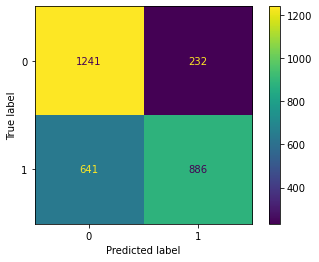

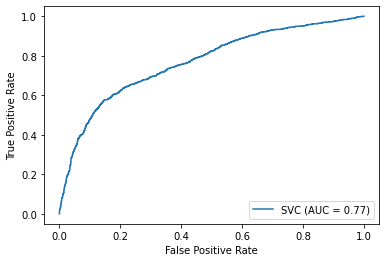

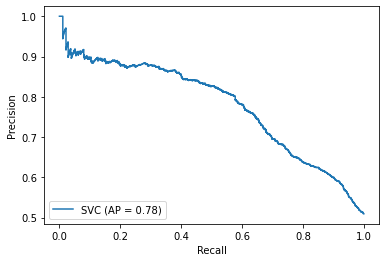

In [21]:
ml_metrics.std_classifier_metrics(clf_svm,X_test, y_test)

In [22]:
param_grid = [
            {'C': [0.5,1,10,100], # C must be > 0 
            'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}
            ]

optimal_params = ms.GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
optimal_params.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [23]:
optimal_params.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [24]:
optimal_params.best_score_

0.7025555555555555

# Final Model

-----Classifier's Performance Summary-----
Accuracy Rate: 70.7%
Precision Rate: 77.4%
Recall Rate: 59.9%
F1 Score: 67.5%



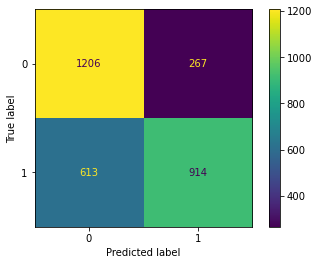

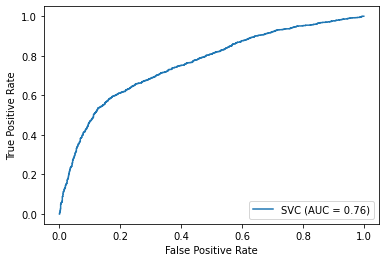

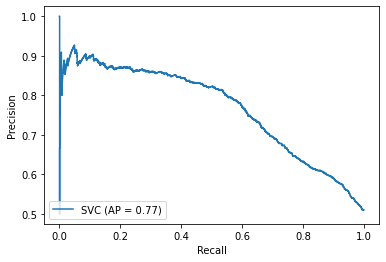

In [25]:
clf_svm_best = svm.SVC(random_state=42, kernel='rbf', C=1, gamma=0.1)
clf_svm_best.fit(X_train, y_train)

ml_metrics.std_classifier_metrics(clf_svm_best, X_test, y_test)

# PCA 

In [26]:
pca = decom.PCA()

X_train_pca = pca.fit_transform(X_train)
per_variance = np.round(pca.explained_variance_ratio_ *100,1)
labels = [str(i) for i in range(1, len(per_variance) + 1)]

Text(0, 0.5, 'Percentage of Explained Variance')

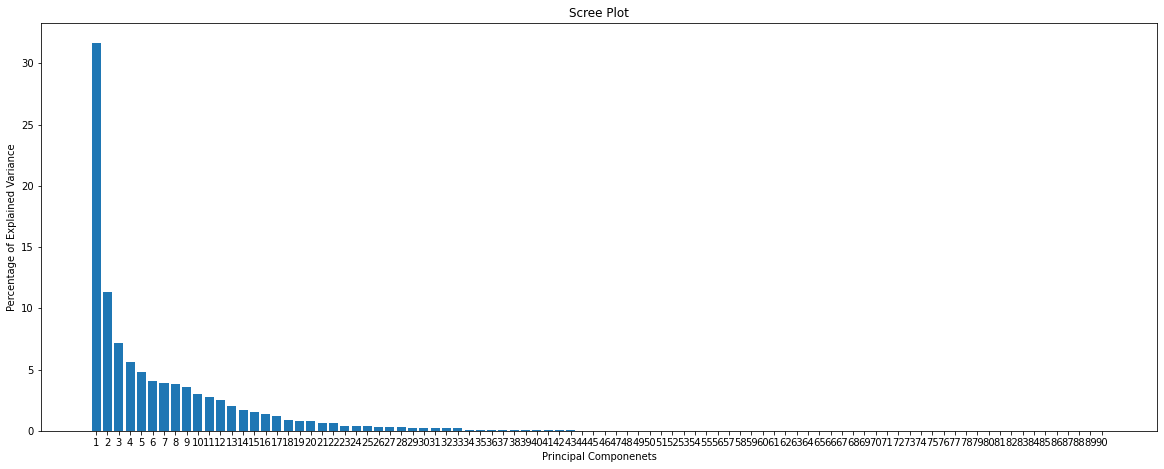

In [27]:
plt.figure(figsize=(20,7.5))
plt.bar(x=labels,height=per_variance)
plt.title('Scree Plot')
plt.xlabel('Principal Componenets')
plt.ylabel('Percentage of Explained Variance')

# Optimize SVM fit to PC1 and PC2

In [28]:
X_train_pc1_coords = X_train_pca[:, 0]
X_train_pc2_coords = X_train_pca[:, 1]

In [29]:
pca_train_data = X_train_pca[:, :2] # we are only looking at PC1 and PC2

param_grid = [
            {'C': [0.5,1,10,100,1000], # C must be > 0 
            'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}
            ]

optimal_params = ms.GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)
optimal_params.fit(pca_train_data, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100, 1000],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [30]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
0.5887777777777778


# Final Model with PCA Attributes

In [31]:
X_test_pca = pca.fit_transform(X_test)
pca_test_data = X_test_pca[:, :2] # pulling out only the first two components

clf_svm = svm.SVC(kernel='rbf', random_state=42, C=0.5, gamma=1)
clf_svm.fit(X_train_pca, y_train)

SVC(C=0.5, gamma=1, random_state=42)